<a href="https://colab.research.google.com/github/mithun-22/AI-echo-sentiment-analysis/blob/main/senti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Shape: (9987, 14)
        date                 title  \
0 2025-02-15            Impressive   
1 2024-10-16         Waste of Time   
2 2024-10-16         Waste of Time   
3 2024-12-21          Not Accurate   
4 2025-03-23  Fantastic Experience   

                                              review  rating  helpful_votes  \
0  Mother former community upon vote fact. Sure s...       2             68   
1  General paper understand main. Or age half won...       5             71   
2  Here situation his high stage. Agree certainly...       4             66   
3  Rule court behind growth reality. Tonight whos...       1              5   
4  Case opportunity season road write. Effort gre...       3             71   

   review_length platform language   location  version verified_purchase  \
0             78   Mobile       es     Canada      3.0                No   
1            193      Web       de      India      4.1               Yes   
2            184      Web       hi      India     

/tmp/ipython-input-2536991050.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette="Set2")


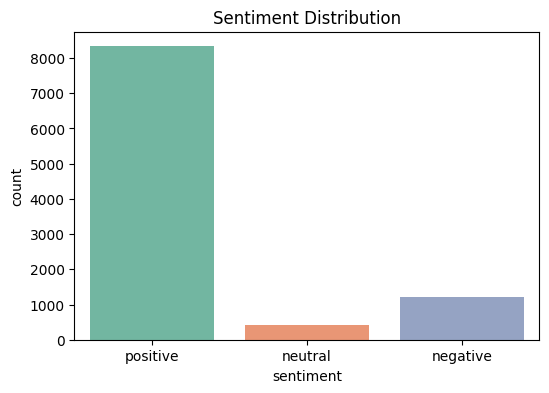

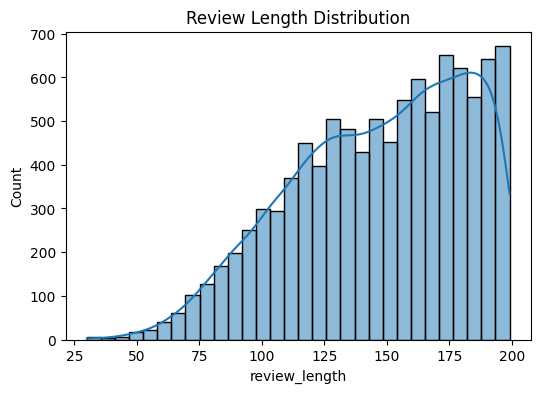

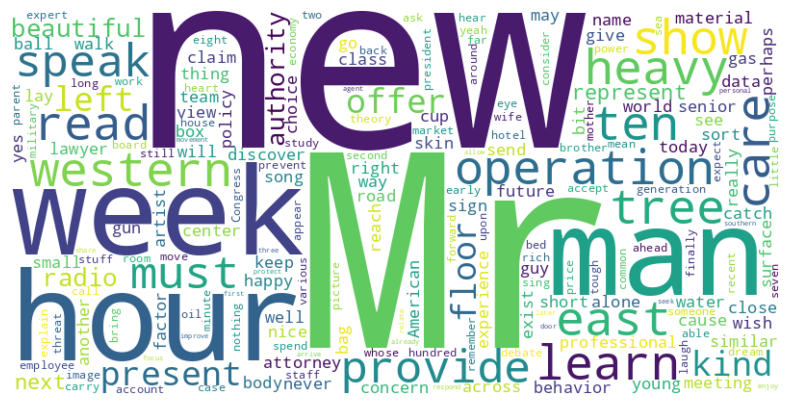

Accuracy: 0.8593593593593594

Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.51      0.55       245
     neutral       0.00      0.00      0.00        86
    positive       0.89      0.96      0.92      1667

    accuracy                           0.86      1998
   macro avg       0.49      0.49      0.49      1998
weighted avg       0.82      0.86      0.84      1998



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


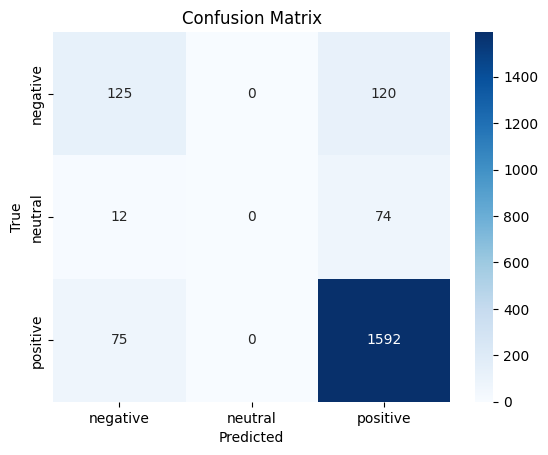

In [5]:
# ================================
# STEP 1: Setup
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# ================================
# STEP 2: Load Data
# ================================
df = pd.read_excel("/content/cleaned_chatgpt_reviews.xlsx")
print("Shape:", df.shape)
print(df.head())

# Check null values
print(df.isnull().sum())

# ================================
# STEP 3: EDA
# ================================
# Label distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sentiment", palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

# Review length distribution
df["review_length"] = df["review"].astype(str).apply(len)
plt.figure(figsize=(6,4))
sns.histplot(df["review_length"], bins=30, kde=True)
plt.title("Review Length Distribution")
plt.show()

# Word cloud (optional)
from wordcloud import WordCloud
text = " ".join(df["review"].astype(str))
wc = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# ================================
# STEP 4: Feature Engineering
# ================================
# Add VADER compound score
df["vader_score"] = df["review"].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    df["review"].astype(str), df["sentiment"], test_size=0.2, random_state=42, stratify=df["sentiment"]
)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Scale VADER score
scaler = StandardScaler()
X_train_vader = scaler.fit_transform(np.array(X_train.apply(lambda x: sia.polarity_scores(x)["compound"])).reshape(-1,1))
X_test_vader = scaler.transform(np.array(X_test.apply(lambda x: sia.polarity_scores(x)["compound"])).reshape(-1,1))

# Combine TF-IDF + VADER
from scipy.sparse import hstack, csr_matrix
X_train_combined = hstack([X_train_tfidf, csr_matrix(X_train_vader)])
X_test_combined = hstack([X_test_tfidf, csr_matrix(X_test_vader)])

# ================================
# STEP 5: Train Model
# ================================
model = LogisticRegression(max_iter=200)
model.fit(X_train_combined, y_train)

# Predictions
y_pred = model.predict(X_test_combined)

# ================================
# STEP 6: Evaluation
# ================================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [6]:
df.head()

,date,title,review,rating,helpful_votes,review_length,platform,language,location,version,verified_purchase,detected_language,merged_review,sentiment,vader_score
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,68,78,Mobile,es,Canada,3.0,No,en,impressive mother former community upon vote f...,positive,0.7096
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,71,193,Web,de,India,4.1,Yes,en,waste time general paper understand main age h...,positive,0.8176
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,66,184,Web,hi,India,4.1,Yes,en,waste time situation high stage agree certainl...,positive,0.9716
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,5,193,Web,fr,Canada,4.0,Yes,en,accurate rule court behind growth reality toni...,positive,0.4019
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,71,131,Web,hi,Australia,4.1,No,en,fantastic experience case opportunity season r...,positive,-0.2732


In [7]:
df.isnull().sum()

,0
date,0
title,0
review,0
rating,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0
version,0


In [8]:
#Removing columns
df.drop(columns = ['date','review_length','platform',	'language',	'location',	'version','verified_purchase','detected_language'], inplace = True)

In [9]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

cleaned1 = lambda x: text_clean_1(x)

<>:8: SyntaxWarning: invalid escape sequence '\['
<>:10: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\['
<>:10: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-3874833610.py:8: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/tmp/ipython-input-3874833610.py:10: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [10]:
# Let's take a look at the updated text
df['cleaned_review'] = pd.DataFrame(df.review.apply(cleaned1))
df.head(20)

,title,review,rating,helpful_votes,merged_review,sentiment,vader_score,cleaned_review
0,Impressive,Mother former community upon vote fact. Sure s...,2,68,impressive mother former community upon vote f...,positive,0.7096,mother former community upon vote fact sure st...
1,Waste of Time,General paper understand main. Or age half won...,5,71,waste time general paper understand main age h...,positive,0.8176,general paper understand main or age half wond...
2,Waste of Time,Here situation his high stage. Agree certainly...,4,66,waste time situation high stage agree certainl...,positive,0.9716,here situation his high stage agree certainly ...
3,Not Accurate,Rule court behind growth reality. Tonight whos...,1,5,accurate rule court behind growth reality toni...,positive,0.4019,rule court behind growth reality tonight whose...
4,Fantastic Experience,Case opportunity season road write. Effort gre...,3,71,fantastic experience case opportunity season r...,positive,-0.2732,case opportunity season road write effort gree...
5,Not Accurate,Top position able wear its between kid. Number...,5,57,accurate top position able wear kid number aut...,positive,0.4939,top position able wear its between kid number ...
6,Very Helpful,Brother individual process always. Sing behind...,1,65,helpful brother individual process always sing...,positive,0.0000,brother individual process always sing behind ...
7,Needs Improvement,Upon bit pick. Seven along unit local these. C...,3,22,need improvement upon bit pick seven along uni...,positive,0.0772,upon bit pick seven along unit local these cha...
8,Fantastic Experience,Number choice student production son understan...,4,69,fantastic experience number choice student pro...,positive,0.0772,number choice student production son understan...
9,Not Accurate,Stand space approach southern.\nGlass federal ...,4,70,accurate stand space approach southern glass f...,positive,0.3182,stand space approach southern\nglass federal c...


In [11]:
# Download the cleaned DataFrame
df.to_csv('cleaned_senti_reviews.csv', index=False)

In [16]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from nltk.corpus import wordnet
import nltk

# Ensure resources
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load dataset
file_path = "/content/cleaned_senti_reviews.csv"
df = pd.read_csv(file_path)

# Map ratings to sentiment
def map_sentiment(rating):
    if rating in [1, 2]:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df["sentiment"] = df["rating"].apply(map_sentiment)

# ---------------- Data Augmentation (Synonym Replacement) ----------------
def synonym_replacement(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([w for w in words if len(wordnet.synsets(w)) > 0]))
    if len(random_word_list) == 0:
        return sentence
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words = [synonym if w == random_word else w for w in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return " ".join(new_words)

augmented_data = []
for idx, row in df.iterrows():
    if row['sentiment'] in ['Neutral']:  # augment minority class
        for _ in range(3):  # generate 3 synthetic reviews
            augmented_text = synonym_replacement(row['cleaned_review'])
            augmented_data.append([augmented_text, row['sentiment']])

# Create augmented DataFrame
aug_df = pd.DataFrame(augmented_data, columns=['cleaned_review','sentiment'])

# Combine original + augmented
final_df = pd.concat([df[['cleaned_review','sentiment']], aug_df], ignore_index=True)

# ---------------- Training ----------------
X = final_df["cleaned_review"]
y = final_df["sentiment"]

# Encode labels
y_encoded = LabelEncoder().fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=15000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# SMOTE balancing
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# XGBoost Model
xgb = XGBClassifier(
    eval_metric="mlogloss",
    use_label_encoder=False,
    n_estimators=400,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train_res, y_train_res)
y_pred = xgb.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Negative","Neutral","Positive"]))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:36:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6884882985452245

Classification Report:
               precision    recall  f1-score   support

    Negative       0.46      0.47      0.46       813
     Neutral       0.92      0.93      0.93      1552
    Positive       0.46      0.44      0.45       797

    accuracy                           0.69      3162
   macro avg       0.61      0.61      0.61      3162
weighted avg       0.68      0.69      0.69      3162



In [17]:
import pandas as pd
import random
import re
import string
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from xgboost import XGBClassifier
from scipy.sparse import hstack, csr_matrix
from nltk.corpus import wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure NLTK resources are available (VADER + WordNet)
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# ---------------- Helper functions ----------------
def basic_clean(text):
    """Normalize text: lowercase, remove punctuation/digits and collapse whitespace.
    Using the same cleaning for training and inference avoids token mismatches."""
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Light synonym replacement used for data augmentation (kept minimal)
def synonym_replacement(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([w for w in words if len(wordnet.synsets(w)) > 0]))
    if len(random_word_list) == 0:
        return sentence
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words = [synonym if w == random_word else w for w in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return " ".join(new_words)

# ---------------- Load & prepare dataset ----------------
file_path = "/content/cleaned_senti_reviews.csv"
df = pd.read_csv(file_path)

# Normalize/ensure a cleaned_review column exists
if 'cleaned_review' not in df.columns:
    df['cleaned_review'] = df['review'].astype(str).apply(basic_clean)
else:
    df['cleaned_review'] = df['cleaned_review'].astype(str).apply(basic_clean)

# Map ratings to sentiment classes (1,2 -> Negative; 3 -> Neutral; 4,5 -> Positive)
def map_sentiment(rating):
    if rating in [1, 2]:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

if 'sentiment' not in df.columns:
    df['sentiment'] = df['rating'].apply(map_sentiment)

print("Original class counts:\n", df['sentiment'].value_counts())

# ---------------- Augmentation (minimal) ----------------
# Create a couple of paraphrases for Neutral samples to increase variety (light-touch)
augmented_data = []
for _, row in df.iterrows():
    if row['sentiment'] == 'Neutral':
        for _ in range(2):
            aug_text = synonym_replacement(row['cleaned_review'])
            augmented_data.append([basic_clean(aug_text), 'Neutral'])

aug_df = pd.DataFrame(augmented_data, columns=['cleaned_review', 'sentiment'])
combined_df = pd.concat([df[['cleaned_review', 'sentiment']], aug_df], ignore_index=True)

# ---------------- Upsample to balance classes ----------------
max_count = combined_df['sentiment'].value_counts().max()
balanced_parts = []
for sentiment, group in combined_df.groupby('sentiment'):
    if len(group) < max_count:
        group_upsampled = resample(group, replace=True, n_samples=max_count, random_state=42)
        balanced_parts.append(group_upsampled)
    else:
        balanced_parts.append(group)

balanced_df = pd.concat(balanced_parts).sample(frac=1, random_state=42).reset_index(drop=True)
print("\nClass counts after upsampling:\n", balanced_df['sentiment'].value_counts())

# ---------------- Add lexicon-based feature (VADER) ----------------
# VADER gives a compact sentiment score (compound) that is useful as an extra feature
analyzer = SentimentIntensityAnalyzer()
balanced_df['vader_compound'] = balanced_df['cleaned_review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# ---------------- Prepare features and labels ----------------
X = balanced_df['cleaned_review']
# controllable mapping so we know class indices
label_to_int = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
int_to_label = {v: k for k, v in label_to_int.items()}
y = balanced_df['sentiment'].map(label_to_int).values

# Train/test split (holdout for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize with TF-IDF (unigrams + bigrams)
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=15000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Compute Vader compound for train/test and scale it
scaler = StandardScaler()
vader_train = np.array([analyzer.polarity_scores(t)['compound'] for t in X_train]).reshape(-1, 1)
vader_test = np.array([analyzer.polarity_scores(t)['compound'] for t in X_test]).reshape(-1, 1)

# Scale to mean=0 std=1 — helps gradient-based learners
vader_train_scaled = scaler.fit_transform(vader_train)
vader_test_scaled = scaler.transform(vader_test)

# Combine TF-IDF sparse matrix with dense vader feature (converted to sparse)
X_train_comb = hstack([X_train_tfidf, csr_matrix(vader_train_scaled)])
X_test_comb = hstack([X_test_tfidf, csr_matrix(vader_test_scaled)])

# ---------------- Train XGBoost with combined features ----------------
xgb = XGBClassifier(
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train_comb, y_train)

# ---------------- Evaluation on holdout ----------------
y_pred = xgb.predict(X_test_comb)
print("\nHoldout Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=[int_to_label[i] for i in sorted(int_to_label.keys())]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------- Interactive user input prediction (with lexicon override) ----------------
# Define a set of strong negative keywords / phrases to catch short inputs like 'bad' or 'worst'
NEGATIVE_PHRASES = [
    'not working', 'does not work', 'not good', 'no longer working', 'stopped working', 'not working properly'
]
NEGATIVE_WORDS = set(['worst', 'terrible', 'awful', 'horrible', 'bad', 'poor', 'disappointed', 'broke', 'broken', 'hate'])

print("\nYou can now enter custom reviews for prediction. Type 'exit' to quit.")
while True:
    user_input = input("Enter a review to predict sentiment (or type 'exit' to quit): ")
    if user_input.strip().lower() == 'exit':
        break

    # Preprocess user input exactly like the training data
    cleaned = basic_clean(user_input)

    # TF-IDF transform
    user_tfidf = vectorizer.transform([cleaned])

    # Compute and scale VADER feature for this single input
    user_vader = np.array([[analyzer.polarity_scores(cleaned)['compound']]])
    user_vader_scaled = scaler.transform(user_vader)

    # Combine features
    user_vec = hstack([user_tfidf, csr_matrix(user_vader_scaled)])

    # Model prediction + probabilities
    probs = xgb.predict_proba(user_vec)[0]
    model_pred_idx = int(probs.argmax())
    model_pred_label = int_to_label[model_pred_idx]

    # Lexicon-based override: if VADER is strongly negative OR a negative keyword/phrase is present,
    # prefer Negative regardless of model output (this is a safety net for short/rare inputs)
    override_to_negative = False
    if float(user_vader[0, 0]) <= -0.35:  # threshold tuned conservatively
        override_to_negative = True
    # check for explicit negative phrases
    for ph in NEGATIVE_PHRASES:
        if ph in cleaned:
            override_to_negative = True
            break
    # check for single negative words (word boundary check)
    cleaned_words = set(cleaned.split())
    if len(cleaned_words & NEGATIVE_WORDS) > 0:
        override_to_negative = True

    final_label = model_pred_label
    override_reason = None
    if override_to_negative:
        final_label = 'Negative'
        override_reason = 'vader_or_keyword'

    # Print both the model's raw prediction (with probabilities) and final label after override
    prob_map = {int_to_label[i]: float(probs[i]) for i in range(len(probs))}
    print(f"\nModel prediction: {model_pred_label} (probabilities: {prob_map})")
    if override_reason:
        print(f"Overrode model prediction -> Final Predicted Sentiment: {final_label} (reason: {override_reason})")
    else:
        print(f"Final Predicted Sentiment: {final_label}")
    print("")

print('Exited.')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Original class counts:
 sentiment
Negative    4065
Positive    3982
Neutral     1940
Name: count, dtype: int64

Class counts after upsampling:
 sentiment
Neutral     5820
Negative    5820
Positive    5820
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:08:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Holdout Accuracy: 0.7677548682703322

Classification Report:
               precision    recall  f1-score   support

    Negative       0.72      0.79      0.75      1164
     Neutral       0.85      0.80      0.83      1164
    Positive       0.74      0.72      0.73      1164

    accuracy                           0.77      3492
   macro avg       0.77      0.77      0.77      3492
weighted avg       0.77      0.77      0.77      3492


Confusion Matrix:
 [[916  78 170]
 [107 932 125]
 [249  82 833]]

You can now enter custom reviews for prediction. Type 'exit' to quit.
Enter a review to predict sentiment (or type 'exit' to quit): the product was good while buying bur it is not performing well now

Model prediction: Negative (probabilities: {'Negative': 0.4511173367500305, 'Neutral': 0.25287532806396484, 'Positive': 0.29600730538368225})
Final Predicted Sentiment: Negative

Enter a review to predict sentiment (or type 'exit' to quit): the product was goo 

Model prediction: Negativ

In [19]:
# Revised training pipeline:
# - Oversample/augment ONLY Negative & Positive (leave Neutral unchanged)
# - Use TF-IDF (1-2 grams) + VADER compound score
# - Train a baseline LogisticRegression and then tune XGBoost via RandomizedSearchCV
# - Evaluate thoroughly and save best model + vectorizer + scaler

import pandas as pd
import random
import re
import string
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from scipy.sparse import hstack, csr_matrix
from nltk.corpus import wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import time

# ------------------------ NLTK downloads ------------------------
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# ------------------------ Helper functions ------------------------
RANDOM_STATE = 42

def basic_clean(text):
    """Lowercase, remove punctuation/digits, collapse spaces."""
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def synonym_replacement(sentence, n=1):
    """Replace up to n words in `sentence` with their WordNet synonyms."""
    words = sentence.split()
    new_words = words.copy()
    # only consider words that have synonyms in WordNet
    candidates = [w for w in words if len(wordnet.synsets(w)) > 0]
    if not candidates:
        return sentence
    random.shuffle(candidates)
    replaced = 0
    for w in candidates:
        synsets = wordnet.synsets(w)
        if synsets:
            # choose a simple synonym (first lemma of first synset)
            syn = synsets[0].lemmas()[0].name()
            new_words = [syn if token == w else token for token in new_words]
            replaced += 1
        if replaced >= n:
            break
    return " ".join(new_words)

# ------------------------ Load dataset ------------------------
# Change path if needed. In Colab upload file to /content/cleaned_reviews.csv
file_path = "/content/cleaned_senti_reviews.csv"
df = pd.read_csv(file_path)

# Make sure we have a 'review' and 'rating' column
assert 'review' in df.columns, "CSV must contain a 'review' column"
assert 'rating' in df.columns, "CSV must contain a 'rating' column"

# Ensure cleaned_review column exists and is normalized in same way used for inference
if 'cleaned_review' not in df.columns:
    df['cleaned_review'] = df['review'].astype(str).apply(basic_clean)
else:
    df['cleaned_review'] = df['cleaned_review'].astype(str).apply(basic_clean)

# Map ratings to sentiment categories
def map_sentiment(rating):
    if rating in [1, 2]:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

if 'sentiment' not in df.columns:
    df['sentiment'] = df['rating'].apply(map_sentiment)

print("Original class counts:\n", df['sentiment'].value_counts())

# ------------------------ Augmentation: ONLY Negative & Positive ------------------------
# Create light paraphrases for Negative and Positive reviews (NOT Neutral).
# This increases diversity particularly where there are few examples.
augmented_rows = []
AUG_PER_SAMPLE = 2  # how many augmented versions to generate per sample (tweakable)

for _, row in df.iterrows():
    label = row['sentiment']
    if label in ('Negative', 'Positive'):
        text = row['cleaned_review']
        for _ in range(AUG_PER_SAMPLE):
            aug = synonym_replacement(text, n=1)  # small change
            aug = basic_clean(aug)
            if aug != text:
                augmented_rows.append({'cleaned_review': aug, 'sentiment': label})

aug_df = pd.DataFrame(augmented_rows)
print(f"Generated {len(aug_df)} augmented samples for Negative/Positive classes.")

# Combine original + augmented (Neutral remains unaugmented)
combined_df = pd.concat([df[['cleaned_review','sentiment']], aug_df], ignore_index=True)
print("Counts after augmentation (before resampling):\n", combined_df['sentiment'].value_counts())

# ------------------------ Oversampling: ONLY Negative & Positive ------------------------
# We will choose a sensible target_count:
# - pick the maximum count among classes AFTER augmentation OR
# - optionally you can set a manual target_count if you want (uncomment below)
target_count = combined_df['sentiment'].value_counts().max()
# target_count =  max(combined_df['sentiment'].value_counts().max(), 50)  # example manual override

balanced_parts = []
for sentiment, group in combined_df.groupby('sentiment'):
    if sentiment == 'Neutral':
        # Keep Neutral unchanged (no oversampling)
        balanced_parts.append(group)
    else:
        # Oversample Negative and Positive up to target_count
        if len(group) < target_count:
            up = resample(group, replace=True, n_samples=target_count, random_state=RANDOM_STATE)
            balanced_parts.append(up)
        else:
            balanced_parts.append(group)

balanced_df = pd.concat(balanced_parts).sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)
print("\nClass counts after oversampling (Negative & Positive only):\n", balanced_df['sentiment'].value_counts())

# ------------------------ Add VADER feature ------------------------
# VADER gives a compact sentiment signal which helps with short texts.
analyzer = SentimentIntensityAnalyzer()
balanced_df['vader_compound'] = balanced_df['cleaned_review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# ------------------------ Prepare features & labels ------------------------
X_text = balanced_df['cleaned_review']
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
inv_label_map = {v:k for k,v in label_map.items()}
y = balanced_df['sentiment'].map(label_map).values

# Split (holdout test)
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# TF-IDF vectorizer (unigrams + bigrams). tune max_features if memory is an issue
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# VADER numeric feature scaling
scaler = StandardScaler()
vader_train = np.array([analyzer.polarity_scores(t)['compound'] for t in X_train_text]).reshape(-1,1)
vader_test = np.array([analyzer.polarity_scores(t)['compound'] for t in X_test_text]).reshape(-1,1)
vader_train_scaled = scaler.fit_transform(vader_train)
vader_test_scaled = scaler.transform(vader_test)

# Combine sparse TF-IDF with dense VADER (converted into sparse)
X_train_comb = hstack([X_train_tfidf, csr_matrix(vader_train_scaled)])
X_test_comb = hstack([X_test_tfidf, csr_matrix(vader_test_scaled)])

# ------------------------ Baseline model: Logistic Regression ------------------------
print("\nTraining baseline Logistic Regression (fast)...")
lr = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=RANDOM_STATE)
t0 = time.time()
lr.fit(X_train_comb, y_train)
t1 = time.time()
y_pred_lr = lr.predict(X_test_comb)
print(f"LogReg done in {t1-t0:.1f}s. Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report (LogReg):\n", classification_report(y_test, y_pred_lr, target_names=[inv_label_map[i] for i in sorted(inv_label_map.keys())]))
print("Confusion Matrix (LogReg):\n", confusion_matrix(y_test, y_pred_lr))

# ------------------------ Tuned model: XGBoost (RandomizedSearchCV) ------------------------
print("\nNow running hyperparameter tuning for XGBoost (RandomizedSearchCV)...")
xgb_base = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=RANDOM_STATE)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 3]
}

rs = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=12,              # number of different hyperparam combos to try (tweakable)
    scoring='f1_macro',     # optimize macro F1 (handles imbalance across classes)
    cv=3,
    verbose=1,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

t0 = time.time()
rs.fit(X_train_comb, y_train)
t1 = time.time()
print(f"RandomizedSearchCV finished in {(t1-t0)/60:.2f} minutes.")
print("Best params:", rs.best_params_)
best_xgb = rs.best_estimator_

# Evaluate tuned XGBoost on holdout
y_pred_xgb = best_xgb.predict(X_test_comb)
print("\nXGBoost (tuned) Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report (XGBoost tuned):\n", classification_report(y_test, y_pred_xgb, target_names=[inv_label_map[i] for i in sorted(inv_label_map.keys())]))
print("Confusion Matrix (XGBoost tuned):\n", confusion_matrix(y_test, y_pred_xgb))

# ------------------------ Choose best model by f1_macro on test ------------------------
from sklearn.metrics import f1_score
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
print(f"\nMacro F1: LogReg={f1_lr:.4f}, XGBoost={f1_xgb:.4f}")

if f1_xgb >= f1_lr:
    final_model = best_xgb
    print("Selected final model: XGBoost (tuned)")
else:
    final_model = lr
    print("Selected final model: Logistic Regression")

# ------------------------ Save final artifacts ------------------------
with open("final_sentiment_model.pkl", "wb") as f:
    pickle.dump(final_model, f)
with open("final_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
with open("final_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
print("\nSaved final_sentiment_model.pkl, final_vectorizer.pkl, final_scaler.pkl")

# ------------------------ Interactive quick-check (optional) ------------------------
def predict_text(text, model=final_model):
    txt = basic_clean(text)
    tf = vectorizer.transform([txt])
    vad = np.array([[analyzer.polarity_scores(txt)['compound']]])
    vad_s = scaler.transform(vad)
    vec = hstack([tf, csr_matrix(vad_s)])
    probs = model.predict_proba(vec)[0]
    pred_idx = int(probs.argmax())
    return inv_label_map[pred_idx], {inv_label_map[i]: float(probs[i]) for i in range(len(probs))}

# Example quick tests
samples = [
    "Worst product ever, completely broke in 2 days",
    "It works fine, nothing special",
    "Amazing performance and great battery life!"
]
print("\nQuick sample predictions:")
for s in samples:
    lab, pm = predict_text(s)
    print(s, "->", lab, pm)

# Done
print("\nPipeline finished.")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Original class counts:
 sentiment
Negative    4065
Positive    3982
Neutral     1940
Name: count, dtype: int64
Generated 3747 augmented samples for Negative/Positive classes.
Counts after augmentation (before resampling):
 sentiment
Negative    5970
Positive    5824
Neutral     1940
Name: count, dtype: int64

Class counts after oversampling (Negative & Positive only):
 sentiment
Negative    5970
Positive    5970
Neutral     1940
Name: count, dtype: int64

Training baseline Logistic Regression (fast)...
LogReg done in 1.2s. Accuracy: 0.4838
Classification Report (LogReg):
               precision    recall  f1-score   support

    Negative       0.56      0.48      0.52      1194
     Neutral       0.20      0.46      0.27       388
    Positive       0.69      0.50      0.58      1194

    accuracy                           0.48      2776
   macro avg       0.48      0.48      0.46      2776
weighted avg       0.57      0.48      0.51      2776

Confusion Matrix (LogReg):
 [[572 418 20

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:42:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV finished in 27.14 minutes.
Best params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}

XGBoost (tuned) Accuracy: 0.6693083573487032
Classification Report (XGBoost tuned):
               precision    recall  f1-score   support

    Negative       0.61      0.85      0.71      1194
     Neutral       0.34      0.10      0.16       388
    Positive       0.81      0.68      0.74      1194

    accuracy                           0.67      2776
   macro avg       0.58      0.54      0.53      2776
weighted avg       0.66      0.67      0.64      2776

Confusion Matrix (XGBoost tuned):
 [[1011   46  137]
 [ 291   40   57]
 [ 354   33  807]]

Macro F1: LogReg=0.4570, XGBoost=0.5342
Selected final model: XGBoost (tuned)

Saved final_sentiment_model.pkl, final_vectorizer.pkl, final_scaler.pkl

Quick sample predictions:
Worst product ever, completely broke in 2 days -> Positive {'Negative': 0.4421821236610412